<a href="https://colab.research.google.com/github/AnnaMuza/Mathematical_Cryptography/blob/main/Lab1/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b>Лабораторна робота 1. Шифр Вiженера. Частотний криптоаналiз</b><br>
Розглядаються тексти українською мовою. При аналiзi текстiв пробiли, цифри та
знаки пунктуацiї iгноруються. Мiнiмальна довжина ключа — 5, максимальна — 20.<br><br>
<i>Виконала Музичина Анна<i>

Л1.1 Побудуйте гiстограму частот появи лiтер в текстi.

In [ ]:
import re
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

%cd /content/drive/MyDrive/Colab Notebooks/Mathematical_Cryptography/Lab1

/content/drive/MyDrive/Colab Notebooks/Mathematical_Cryptography/Lab1


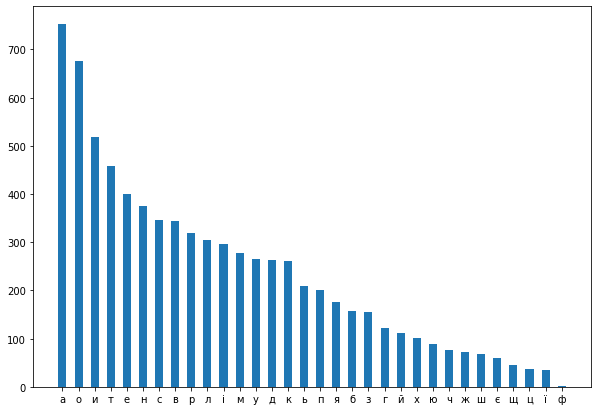

'всейдевсеминаєікраюнемаєкудижвоноділосьвідкілявзялосьідуреньімудрийнічогонезнаєживеумираєоднозацвілоадругезавялонавікизавялоілистяпожовклевітрирознеслиасонечковстанеякпершевставалоізорічервоніякпершеплилипопливутьіпотімітибілолицийпосиньомунебувийдешпогулятьвийдешподивитьсявжолобоккриницюівморебезкраєібудешсіятьякнадвавілономнадйогосадамиінадтимщобудезнашимисинамитивічнийбезкраюлюблюрозмовлятьякзбратомзсестроюрозмовлятьзтобоюспіватьтобідумущотижнашептавпорайменіщераздедітисьзжурбоюянеодинокийянесиротаєстьуменедітитадеїхподітизаховатьзсобоюгріхдушаживааможеїйлегшебуденатімсвітіякхтопрочитаєтісльозисловащотаквонащироколисьвиливалащотаквонанишкомнаднимиридаланінезаховаюбодупіаживаякнебоблакитненемайомукраютакдушіпочинуікраюнемаєадевонабудехимернісловазгадайжехтонебудьїїнасімсвітібезславномутяжкосейсвітпокидатьзгадайтедівчатавамтребазгадатьвонаваслюбиларожевіїквітиіпровашудолюлюбиласпіватьпокисонцевстанеспочивайтедітиаяпоміркуюватажкадевзятьсинимоїгайдамакисвітширокийволяідітьсинипогуляйт

In [ ]:
with open('Lab1_input.txt', 'r') as f:
    text = f.read()

text = re.sub(r'[^а-яґєії]', '', text.lower())
c = Counter(text)

plt.figure(figsize=(10, 7))
plt.bar(*zip(*c.most_common()), width=.5)
plt.show()
text

Л1.2 Реалiзуйте алгоритм шифрування Вiженера.

In [ ]:
def generateKey(text, keyword):
    kw_len = len(keyword)
    key = keyword * (len(text) // kw_len + 1)
    return key


def encryption(text, key): 
    encrypt_text = ""
    for e, s in enumerate(text):
        ind = (ltrs.find(s) + ltrs.find(key[e])) % 33
        encrypt_text += ltrs[ind]
    return encrypt_text


def decryption(encrypt_text, key):
    orig_text = ""
    for e, s in enumerate(encrypt_text):
        ind = (ltrs.find(s) - ltrs.find(key[e])) % 33
        orig_text += ltrs[ind]
    return orig_text


ltrs = 'абвгґдеєжзиіїйклмнопрстуфхцчшщьюя'
keyword = 'гайдамаки'
key = generateKey(text, keyword)
encrypt_text = encryption(text, key)
encrypt_text

# with open('Lab1_output.txt', 'w') as f:
#     f.write(encrypt_text)

'дсподтввмпиьдєчкбибнпсаукґлйжлунбдххссиєіскххввтґлбсісжуаінйіьажруонччяйснпкнмєтрдегсигасшжнюказвххсаохупеуидяшунмвхфйзйєяюоххйсвґпбжяїнлпєідрфьсзьісюикюснпякбввягнпґквебдзвбчаоащшкзюхіиебїснфґквебдзпшллцпящоилштйіашхіщмтцбххслуюищпяюйниуменріцвуодтшашеушґтйвфужежфосимрхьбґвфощшґочпрцнфгбілсогелмїкадєчбґлзшбмядьйфраоєаоіщшрощтасйяйссйиаяихчгдвлмїолажеттаіиьрфиьдмцтфїкчьлйнеуфуаірюнлїьсзщувюягєвктермтяцїспцтгоїьсзщувюягєїтюеоксасдаввтббхлцмгбодитчгшпфтмвашуацсеаіимуатиесігрфьтйугбяжвнпудцняфййїтеґибшхарцтйуьмреомтцтклзїдфосігрїадувмтіпфокуюпрхвжужджцвкипосіїщлрйюекшдтнкякмбєідійфштюфрбчфягєвмсюьяпйсшувмщяягклунмщфьскюриґьмроилдлмщяягклунмнфднощтаснфцйруиаюаюсретдхбвкжґоошпчатрдаїпнтбяіоачлтаеюмпацумекбибтйпдешхщсчутучкбибнпсауапмдоьдбедрвймпхнчсщшдатжасачозхвунтбґлаїхтаґіьюдівмбтзвхгвьуметйонобійґвхяточлдмтіпеаодйдепсдчйчаоаьяуекдзпапихьлунмвкюоюкллмряозвфнкоігркпаувмшґлслірюнищифпфєадьашнибунземюхаьісвожрдацчесігргяяумчршабвйчафкклзвтґтйсфчймюнгмйпипачлсоігдйрюпищвяхвіомтйсфчйпюжуюячя

In [ ]:
orig_text = decryption(encrypt_text, key)
orig_text

'всейдевсеминаєікраюнемаєкудижвоноділосьвідкілявзялосьідуреньімудрийнічогонезнаєживеумираєоднозацвілоадругезавялонавікизавялоілистяпожовклевітрирознеслиасонечковстанеякпершевставалоізорічервоніякпершеплилипопливутьіпотімітибілолицийпосиньомунебувийдешпогулятьвийдешподивитьсявжолобоккриницюівморебезкраєібудешсіятьякнадвавілономнадйогосадамиінадтимщобудезнашимисинамитивічнийбезкраюлюблюрозмовлятьякзбратомзсестроюрозмовлятьзтобоюспіватьтобідумущотижнашептавпорайменіщераздедітисьзжурбоюянеодинокийянесиротаєстьуменедітитадеїхподітизаховатьзсобоюгріхдушаживааможеїйлегшебуденатімсвітіякхтопрочитаєтісльозисловащотаквонащироколисьвиливалащотаквонанишкомнаднимиридаланінезаховаюбодупіаживаякнебоблакитненемайомукраютакдушіпочинуікраюнемаєадевонабудехимернісловазгадайжехтонебудьїїнасімсвітібезславномутяжкосейсвітпокидатьзгадайтедівчатавамтребазгадатьвонаваслюбиларожевіїквітиіпровашудолюлюбиласпіватьпокисонцевстанеспочивайтедітиаяпоміркуюватажкадевзятьсинимоїгайдамакисвітширокийволяідітьсинипогуляйт

Л1.3 Проведiть криптоаналiз шифру Вiженера i розшифруйте запропонований крипто-текст, не знаючи секретного ключа (пiдказка).

In [ ]:
def isLetter(char):
	return (char in ltrs)

def countLetters(text):
	count = 0
	for i in text:
		if(isLetter(i)):
			count += 1
	return count

def getIOC(text):
	letterCounts = []

	for i in range(len(ltrs)):
		count = 0
		for j in text:
			if j == ltrs[i]:
				count += 1
		letterCounts.append(count)

	total = 0
	for i in range(len(letterCounts)):
		ni = letterCounts[i]
		total += ni * (ni - 1)

	N = countLetters(text)
	c = 33
	total = float(total) / ((N * (N - 1)))
	return total

In [ ]:
l = []
text_len = len(encrypt_text)

for step in range(5, 21):
    temp = []
    for j in range(step):
        a = ''
        for i in range(j, text_len, step):
            a += encrypt_text[i]
        temp.append(a)
    l.append(temp)

ic = [[getIOC(j) for j in i] for i in l]
# print(ic)
ic_avrg = [sum(i)/len(i) for i in ic]
keyword_len = 5 + ic_avrg.index(max(ic_avrg))
keyword_len

9

In [ ]:
def GetCS(plaintext):
    counts = [0 for i in range(33)]
    expected = [0.0834, 0.0153, 0.0550, 0.0159, 0.0001, 0.0306, 0.0459, 0.0039, 0.0071,
                0.0210, 0.0600, 0.0124, 0.0623, 0.0084, 0.0400, 0.0393, 0.0302, 0.0710,
                0.0928, 0.0284, 0.0548, 0.0457, 0.0477, 0.0338, 0.0035, 0.0117, 0.0102,
                0.0115, 0.0071, 0.0032, 0.0183, 0.0070, 0.0216];
    totcount = 0;

    for i in plaintext:
        counts[ltrs.index(i)] += 1
        totcount += 1

    sum1 = 0.0;
    for i in range(33):
        sum1 = sum1 + ((counts[i] - totcount*expected[i]) ** 2) / (totcount * expected[i]);

    return sum1


def Caesar(text, num):
    encrypt_text = ""
    for e, s in enumerate(text):
        ind = (ltrs.find(s) - num) % 33
        encrypt_text += ltrs[ind]
    return encrypt_text


keyword_get = ''
for j in range(keyword_len):
    period = ''
    css = []
    for i in range(j, text_len, keyword_len):
        period += encrypt_text[i]
    for k in range(0, 33):
        a = Caesar(period, k)
        cs = GetCS(a)
        css.append(cs)
        # print(f'{i:2}   {a[:30]}...   {cs}')

    s = ltrs[css.index(min(css))]
    keyword_get += s
    print(s)

г
а
й
д
а
м
а
к
и


In [ ]:
key_get = generateKey(encrypt_text, keyword_get)
orig_text_guess = decryption(encrypt_text, key_get)
orig_text_guess

'всейдевсеминаєікраюнемаєкудижвоноділосьвідкілявзялосьідуреньімудрийнічогонезнаєживеумираєоднозацвілоадругезавялонавікизавялоілистяпожовклевітрирознеслиасонечковстанеякпершевставалоізорічервоніякпершеплилипопливутьіпотімітибілолицийпосиньомунебувийдешпогулятьвийдешподивитьсявжолобоккриницюівморебезкраєібудешсіятьякнадвавілономнадйогосадамиінадтимщобудезнашимисинамитивічнийбезкраюлюблюрозмовлятьякзбратомзсестроюрозмовлятьзтобоюспіватьтобідумущотижнашептавпорайменіщераздедітисьзжурбоюянеодинокийянесиротаєстьуменедітитадеїхподітизаховатьзсобоюгріхдушаживааможеїйлегшебуденатімсвітіякхтопрочитаєтісльозисловащотаквонащироколисьвиливалащотаквонанишкомнаднимиридаланінезаховаюбодупіаживаякнебоблакитненемайомукраютакдушіпочинуікраюнемаєадевонабудехимернісловазгадайжехтонебудьїїнасімсвітібезславномутяжкосейсвітпокидатьзгадайтедівчатавамтребазгадатьвонаваслюбиларожевіїквітиіпровашудолюлюбиласпіватьпокисонцевстанеспочивайтедітиаяпоміркуюватажкадевзятьсинимоїгайдамакисвітширокийволяідітьсинипогуляйт